<a href="https://colab.research.google.com/github/Volt-github24/Groupe-4-info-l3-datasciences-tutoriels/blob/main/CAH_(10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFOL3 - SDD- UY1 - Departement d'informatique**

# **CLASSIFICATION ASCENDANTE HIERACHIQUE (CAH) AVEC PYTHON**

 >>>  [*Hierarchical Clustering with Python and Scikit-Learn*](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)




                                   
### Noms des membres du groupe (**Groupe 4**) :
  1. NOUCHEN TCHAMBA Parnell Voltaire - 19M2326
  2. DJEUMEZA DONGMO Julie Merveille - 19M2105
  3. MADJOU Alvine Patricia - 19M2103
  4. NAKAM YOPDUP Manuella Kristeva - 19M2233

Connexion avec le drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**EXEMPLE** **1**

Dans notre premier exemple nous ferons les regroupements des observations de notre jeu de donnees X en nous servant du nombre de cluster approprié obtenu à partir du tracé de son dendogramme effectué plus haut 

Nous importons tout d'abord toutes les bibliothèques requises

In [1]:
import matplotlib.pyplot as plt #representation graphique en 2D
import pandas as pd # manipulation des donnees
%matplotlib inline
import numpy as np # manipulation des tableaux


Puis nous creons notre ensemble de donnees sur lequel nous appliquerons la classification hierarchisée. À noter que c'est le meme que celui creer plus haut

In [2]:
X = np.array([[5,3],
              [10,15],
              [15,12],
              [24,10],
              [30,30],
              [85,70],
              [71,80],
              [60,78],
              [70,55],
              [80,91],])

À present nous procedons au regroupement des observations de notre jeu de donnees en 2 groupes 

In [3]:
from sklearn.cluster import AgglomerativeClustering # on importe la classe nous permettant d'effectuer des regroupements

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') # ensuite on la parametre en entrant 2 comme nombre de cluster , la distance euclidienne comme distance utilisé
cluster.fit_predict(X) # On fait l'entrainement et les predictions de cluster sur notre jeu de donnees

"""on a donc en sortie un tableau de 10 elements où chacun correspond au cluster auquel chaque observations appartient.
On peut donc observer que les 5 premieres observations ont donc ete regroupées en un premier cluster et les 5 dernières en un second cluster 

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

Pour finir avec ce premier exemple nous tracons notre jeu de donnees pour pouvoir visualiser comment ses observations sont effectivement regroupées en 2 clusters 

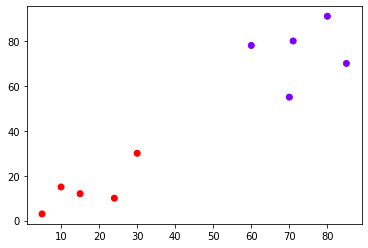

In [5]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

**EXEMPLE 2**

Afin de mener a bien notre tache il est necessaire d'importer  certaines librairies

In [ ]:
import matplotlib.pyplot as plt #representation graphique en 2D
import pandas as pd #manipulation et analyse des donnees
%matplotlib inline
import numpy as np #manipulation des tableaux

Ensuite on importe le dataset "shopping-data" qui sera utilise tout au long de cet exemple

In [ ]:
customer_data = pd.read_csv('/content/drive/MyDrive/ML/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')

In [ ]:
customer_data.shape #pour les differentes dimensions du dataset

(200, 5)

Notre dataset a donc 200 observations et 5 attributs

In [ ]:
customer_data.head() #pour afficher les 5 premieres observations du dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Notre ensemble de données comporte donc cinq attributs : CustomerID, Genre, Age, Annual Income et Spending Score. 

Dans la suite  nous allons travailler uniquement avec deux attributs Annual Income(revenu annuel) et Spending Score(Score de dépenses).

In [ ]:
data = customer_data.iloc[:, 3:5].values #Selectionner les colonnes 3 et 4
#on utilise .iloc() avec les numeros des colonnes et .loc() avec le nom des colonnes
data


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Par la suite il est question de regrouper les clients en fonction de leur salaire annuel et de leurs depenses . Pour cela on va utiliser la classification hierarchique basee sur la methode de Ward

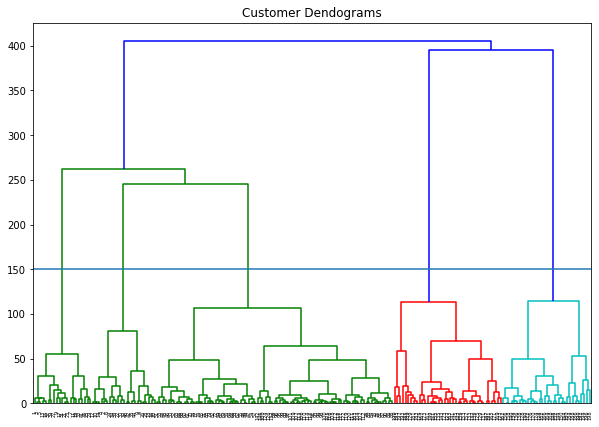

In [ ]:
import scipy.cluster.hierarchy as shc #pour la classification hierarchique

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.axhline(y=150)

On obtient notre dendogramme 

A partir du dendogramme nous pouvons donc regrouper nos donnees en 5 clusters car c'est a partir de 5 clusters que la distance de dissimilarite est maximale .

 Le bout de code qui suit a pour but d'affecter un cluster a chacune des observations.

On utilisera la distance euclidienne et la methode de Ward comme parametre de la fonction AgglomerativeClustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Nous allons ensuite tracer le nuage des points du salaire en fonction des depenses.

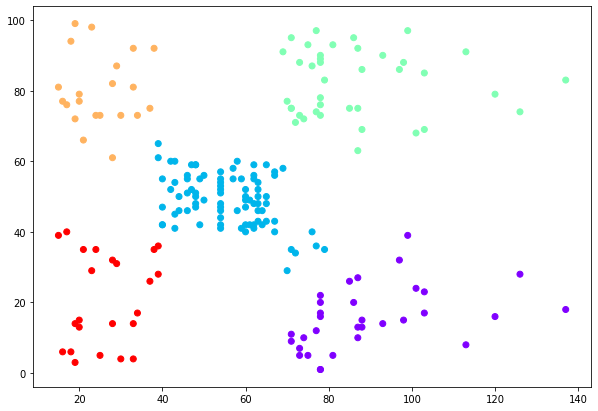

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

Nous constatons que les classes sont bien distinctes les unes des autres. La classification hierarchique ascendante bien qu'etant couteuse permet de faire une bonne classification.